### FIGURAS

Estudio del máximo de la barrera

0.06944444444444445j 0.05j
0.06944444444444445j 0.05j


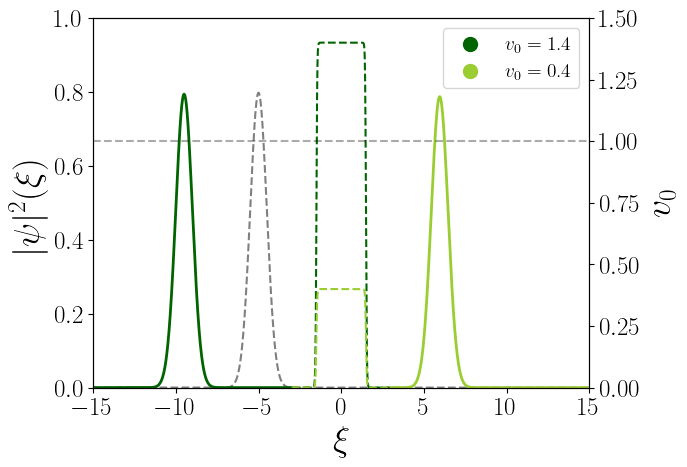

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from matplotlib import rcParams

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500 # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.001  # Paso temporal (en unidades adimensionales)
t_max = 7.5 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Parámetros del paquete de ondas, función de onda input
xi0 = -5 # Posición inicial partícula
kappa_0 = 100 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)



# Barrera de potencial
alpha_param =60  
v_0 = 1.4 # Altura del potencial (V_0/Ec)
b = 1.5 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial





# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()

# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

# Plot
fig, ax = plt.subplots()

ax.plot(xi, np.abs(psi0)**2, color='black', linestyle='--', alpha = 0.5)  # Initial wave packet



# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
mask = (xi >= -15) & (xi <= -3)
line, = ax.plot(xi[mask], np.abs(psi[mask])**2, color='darkgreen',linewidth=2) # plot de |psi|^2
ax.set_ylabel('Probability Density', size=16)

# ax.text(6.5, 0.8, 'τ = 7', color='yellowgreen', fontsize=10, ha='center', va='bottom')

# Plot de la barrera
mask = (xi >=-3) & (xi <= 3)
ax.plot(xi[mask], v[mask]*(2/3), color='darkgreen', linestyle='--',alpha = 1 )






# Barrera de potencial
alpha_param =60  
v_0 = 0.4 # Altura del potencial (V_0/Ec)
b = 1.5  # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial




# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()


# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)


# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
mask = (xi >= 3) & (xi <= 15)
line, = ax.plot(xi[mask], np.abs(psi[mask])**2,color='yellowgreen',linewidth=2) # plot de |psi|^2
ax.set_ylabel(r'$|\psi|^2 (\xi)$', size=26)

# ax.text(-8.5, 0.8, 'τ = 7', color='darkgreen', fontsize=10, ha='center', va='bottom')

# Plot de la barrera
mask = (xi >=-3) & (xi <= 3)
ax.plot(xi[mask], v[mask]*(2/3), color='yellowgreen', linestyle='--',alpha = 1 )

# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel(r'$v_0$',color='k',size = 26)
ax2.tick_params(axis='y', colors='k')  
ax2.spines['right'].set_color('k') 



ax2.axhline(y=1, color='k', linestyle='--',alpha = 0.33)


# Plot colored squares and text
ax.scatter([], [], color='darkgreen', s=100, label=r'$v_0 = 1.4$')  # Red square
ax.scatter([], [], color='yellowgreen', s=100, label=r'$v_0 = 0.4$')  # Blue square

ax.set_xlabel(r'$\xi$', fontsize=26)
# Apply tick parameters to both axes (main plot and secondary axis)
ax.tick_params(axis='both', labelsize=18)  # Apply to the primary axis
ax2.tick_params(axis='y', labelsize=18)  # Apply to the secondary axis


# Add the legend with the colored squares
ax.legend(loc='upper right', fontsize=14)


plt.show()

Estudio del valor de kappa

0.19397630336411456
0.09239266369432718
0.03346114113805952
4.0641322996579575e-05


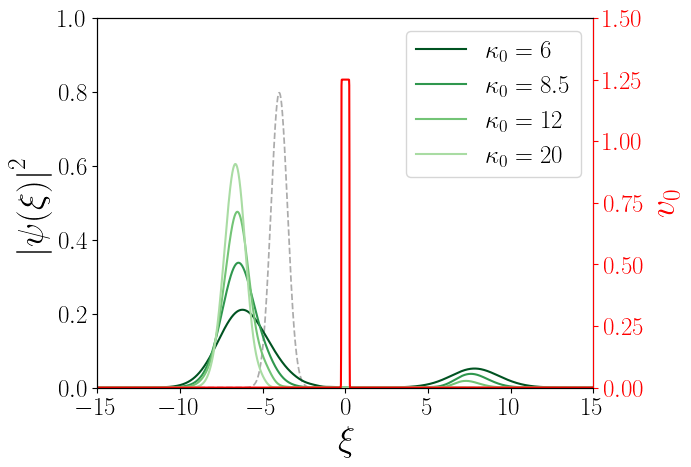

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from matplotlib import rcParams

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500  # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.0005  # Paso temporal (en unidades adimensionales)
t_max = 5.25  # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales

# Barrera de potencial
alpha_param = 60  
v_0 = 1.25  # Altura del potencial (V_0/Ec)
b = 0.25  # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial

def calculate_positive_kappa_probability(psi, xi, kmax , kmin):
    k = np.fft.fftfreq(len(xi), d=xi[1] - xi[0]) * 2 * np.pi
    psi_k = np.fft.fft(psi) * (xi[1] - xi[0])  # Fourier transform
    
    a = kmin
    b = kmax    

    positive_k_mask = (k > a) & (k < b)
    
    prob_positive_k = np.sum(np.abs(psi_k[positive_k_mask])**2)
    
    total_prob = np.sum(np.abs(psi_k)**2)
    
    return prob_positive_k / total_prob


# Función para evolucionar la onda
def evolve_wave_packet(kappa_0, xi0, v, t_steps, dt, dx, N):
    # Inicialización de la función de onda
    psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)

    # Matrices Crank-Nicolson 
    alpha = 1j * dt / (kappa_0 * dx**2)  
    beta = 1j * dt * kappa_0 / 2  

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Solución del problema
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)
    
    return psi

# Plot
fig, ax = plt.subplots()

# Initial wave packet plot
ax.plot(xi, np.abs((2 / np.pi)**(1/4) * np.exp(-(xi - (-4))**2) * np.exp(1j * 6 * xi))**2, 
        color='black', linestyle='--', alpha=0.33, linewidth=1.25)  # Initial wave packet
# ax.text(-4, 0.8, r'$\tau = 0$', color='black', fontsize=10, ha='center', va='bottom', alpha=0.5)

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  

kappa_values = [
                6,
                8.5, 
                12, 
                20,
                ]
colors = [plt.cm.Greens(0.95), plt.cm.Greens(0.7), plt.cm.Greens(0.5), plt.cm.Greens(0.35)]

for kappa, color in zip(kappa_values, colors):
    psi = evolve_wave_packet(kappa, xi0=-4, v=v, t_steps=t_steps, dt=dt, dx=dx, N=N)
    print(calculate_positive_kappa_probability(psi, xi, 20,0 ))
    psi_squared = np.abs(psi)**2
    ax.plot(xi, psi_squared, label=r'$\kappa_0 = {}$'.format(kappa), color=color, linewidth=1.5)

# Plot de la barrera
ax.plot(xi, v * (2 / 3), color='r', linestyle='-', alpha=1)

# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel(r'$v_0$', color='r', size=26)
ax2.tick_params(axis='y', colors='red')  
ax2.spines['right'].set_color('red') 

# Apply tick parameters to both axes (main plot and secondary axis)
ax.tick_params(axis='both', labelsize=18)  # Apply to the primary axis
ax2.tick_params(axis='y', labelsize=18)  # Apply to the secondary axis

# Labels and Legend
ax.set_xlabel(r'$\xi$', fontsize=26)
ax.set_ylabel(r'$\left|\psi(\xi)\right|^2$', fontsize=26)
ax.legend(loc='upper right', fontsize=18)

plt.show()


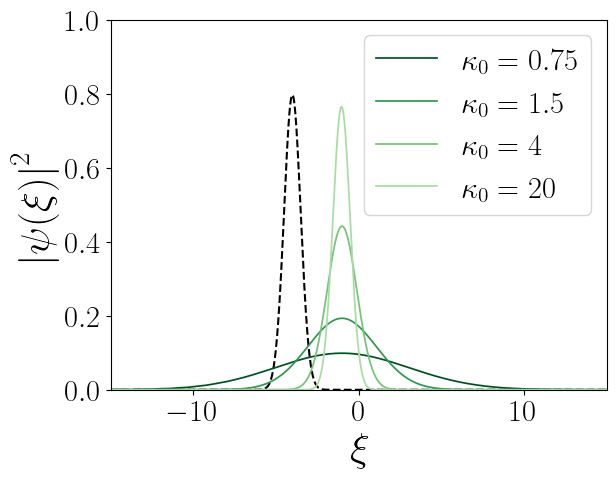

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from matplotlib import rcParams

# Enable LaTeX rendering
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Default LaTeX font

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500  # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.001  # Paso temporal (en unidades adimensionales)
t_max = 1.5  # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales

# Barrera de potencial
alpha_param = 60  
v_0 = 1.25  # Altura del potencial (V_0/Ec)
b = 0.25  # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial
v = np.zeros(N)

# Función para evolucionar la onda
def evolve_wave_packet(kappa_0, xi0, v, t_steps, dt, dx, N):
    # Inicialización de la función de onda
    psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)

    # Matrices Crank-Nicolson 
    alpha = 1j * dt / (kappa_0 * dx**2)  
    beta = 1j * dt * kappa_0 / 2  

    diagonal_a = (1 + alpha + beta * v) * np.ones(N)
    off_diagonal = -(alpha / 2) * np.ones(N - 1)
    A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

    diagonal_b = (1 - alpha - beta * v) * np.ones(N)
    B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

    # Inicialización de la función de onda
    psi = psi0.copy()

    # Solución del problema
    for t in range(t_steps):
        psi = spsolve(A, B @ psi)
    
    return np.abs(psi)**2

# Plot
fig, ax = plt.subplots()

# Initial wave packet plot
ax.plot(xi, np.abs((2 / np.pi)**(1/4) * np.exp(-(xi - (-4))**2) * np.exp(1j * 6 * xi))**2, 
        color='black', linestyle='--', alpha=1, linewidth=1.5)  # Initial wave packet
# ax.text(-4, 0.8, r'$\tau = 0$', color='black', fontsize=10, ha='center', va='bottom', alpha=0.5)

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  

kappa_values = [0.75,
                1.5, 
                4, 
                20
                ]
colors = [plt.cm.Greens(0.95), plt.cm.Greens(0.7), plt.cm.Greens(0.5), plt.cm.Greens(0.35)]

for kappa, color in zip(kappa_values, colors):
    psi_squared = evolve_wave_packet(kappa, xi0=-4, v=v, t_steps=t_steps, dt=dt, dx=dx, N=N)
    ax.plot(xi, psi_squared, label=r'$\kappa_0 = {}$'.format(kappa), color=color, linewidth=1.25)

# Plot de la barrera
# ax.plot(xi, v * (2 / 3), color='r', linestyle='--', alpha=0.8)

# Eje para la barrera
ax2 = ax.twinx()  
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel(r'$v_0$', color='r', size=26)
ax2.tick_params(axis='y', colors='red')  
ax2.spines['right'].set_color('red') 

# Apply tick parameters to both axes (main plot and secondary axis)
ax.tick_params(axis='both', labelsize=22)  # Apply to the primary axis
ax2.tick_params(axis='y', labelsize=22)  # Apply to the secondary axis

# Labels and Legend
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.set_ylabel(r'$\left|\psi(\xi)\right|^2$', fontsize=30)
ax.legend(loc='upper right', fontsize=22)
ax2.remove()
plt.show()


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500 # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales







# Barrera de potencial
alpha_param =60  
v_0 = 0 # Altura del potencial (V_0/Ec)
b = 0.25 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial

fig, ax = plt.subplots()


# Parámetros del paquete de ondas, función de onda input
xi0 = -4 # Posición inicial partícula
kappa_0 = 40 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)
dt = 0.04 # Paso temporal (en unidades adimensionales)
t_max = 1.5 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()



# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)


# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
line, = ax.plot(xi, np.abs(psi)**2, label=f'κ0={kappa_0}, dt = {dt}',color=plt.cm.Greys(0.45),linewidth=2) # plot de |psi|^2


# Parámetros del paquete de ondas, función de onda input
xi0 = -4 # Posición inicial partícula
kappa_0 = 40 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)
dt = 0.1  # Paso temporal (en unidades adimensionales)
t_max = 1.5 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la función de onda
psi = psi0.copy()



# Solución del problema
for t in range(t_steps):
    psi = spsolve(A, B @ psi)


# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)  
line, = ax.plot(xi, np.abs(psi)**2, label=f'κ0={kappa_0}, dt = {dt}',color=plt.cm.Greys(0.3),linewidth=2) # plot de |psi|^2

ax.set_xlabel('ξ', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

plt.show()

6.944444444444444j 0.8j
17.36111111111111j 2j


RuntimeError: latex was not able to process the following string:
b'\\u03be'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpfyf39h53 5a2ab4aa493af4ec0bbf8d70df862aab.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./5a2ab4aa493af4ec0bbf8d70df862aab.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 5a2ab4aa493af4ec0bbf8d70df862aab.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ξ (U+03BE)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily ξ
                  }%
No pages of output.
Transcript written on tmpfyf39h53/5a2ab4aa493af4ec0bbf8d70df862aab.log.




<Figure size 640x480 with 1 Axes>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500  # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.0005  # Paso temporal (en unidades adimensionales)
t_max = 0  # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales

# Parámetros del paquete de ondas, función de onda input
xi0 = -11  # Posición inicial partícula
kappa_0 = 4  # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)

# Altura y grosor de la barrera de potencial
v_0 = 1.4  # Altura del potencial (V_0/Ec)
b = 1.4  # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)

# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha, beta)

diagonal_a = (1 + alpha + beta * v_0) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v_0) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")

# Inicialización de la función de onda
psi = psi0.copy()

# Solución del problema (t=0, no evolución en el tiempo)
for t in range(t_steps):
    psi = spsolve(A, B @ psi)

# Plot
fig, ax = plt.subplots()

# Plot de la densidad de probabilidad
ax.set_xlim(-L/2, L/2)
ax.set_ylim(0, 1)
line, = ax.plot(xi, np.abs(psi)**2, label=f't={t_max}', color='k', linewidth=2)  # plot de |psi|^2
ax.set_ylabel('|ψ|² (x)', size=12)

# Eje para la barrera
ax2 = ax.twinx()
ax2.set_ylim(0, 1.5)  # Límite = max barrera pot
ax2.set_ylabel('V(x)', color='k', size=12)
ax2.tick_params(axis='y', colors='k')
ax2.spines['right'].set_color('k')

# Valores de alpha a plotear
alpha_values = [3, 6, 20]
colors = ['r', 'g', 'b']
linestyles = ['-', '-', '-']

# Plot de la barrera de potencial para diferentes alphas
for alpha_param, color, linestyle in zip(alpha_values, colors, linestyles):
    v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial
    mask = (xi >= -8.5) & (xi <= 8.5)
    ax2.plot(xi[mask], v[mask], color=color, linestyle=linestyle, label=f'α = {alpha_param}', alpha=1)

# Añadir leyenda para la barrera
ax2.legend(loc='lower right')

# Líneas adicionales
ax2.axhline(y=v_0, color='black', linestyle='--', alpha=0.33)
plt.axvline(x=b, color='k', linestyle='--', alpha=0.33)
plt.axvline(x=-b, color='k', linestyle='--', alpha=0.33)
ax.set_xlabel('x', fontsize=14)
ax.annotate('', xy=(xi0 + 3, 0.85), xytext=(xi0 - 2, 0.85),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8))
ax.set_xticks([0, -11, -b, b])  # Set ticks at x = 0 and x = -11
ax.set_xticklabels(['0', '$x_0$', '-b', 'b'])
ax2.set_yticks ([0,v_0])
ax2.set_yticklabels (['0','V0'])

plt.show()


0.8680555555555556j 0.001j


RuntimeError: latex was not able to process the following string:
b'|\\u03c8|\\xb2 (x)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpsnkgstvq cd4856c848bd606827548cb8b81cb4c0.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./cd4856c848bd606827548cb8b81cb4c0.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file cd4856c848bd606827548cb8b81cb4c0.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ψ (U+03C8)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily |ψ
                   |² (x)}%
No pages of output.
Transcript written on tmpsnkgstvq/cd4856c848bd606827548cb8b81cb4c0.log.




<Figure size 640x480 with 2 Axes>

In [63]:
b = 15
L = 150
N = 5000
xi = np.linspace(-L / 2, L / 2, N) 

# Plot
fig, ax = plt.subplots()

# Plot
ax.set_xlim (-L/2, L/2)
ax.set_ylim(0, 1.1)  # Límite = max barrera pot
ax.set_ylabel('v(ξ)', color='k', size=16)
ax.tick_params(axis='y', colors='k')
ax.spines['right'].set_color('k')

# Valores de alpha a plotear
alpha_values = [100]
colors = [0.95]
linestyles = ['-']

# Plot de la barrera de potencial para diferentes alphas
for alpha_param, color, linestyle in zip(alpha_values, colors, linestyles):
    v =  ( 1 - 1 / (1 + np.abs((xi+30) / b)**alpha_param))  + ( 1 - 1 / (1 + np.abs((xi- 30) / b)**alpha_param)) - 1
    ax.plot(xi, v, color=plt.cm.Reds(color), linestyle=linestyle, label=f'α = {alpha_param}', alpha=1)



# Líneas adicionales
plt.axvline(x=b, color='k', linestyle='--', alpha=1)
plt.axvline(x=-b, color='k', linestyle='--', alpha=1)
plt.axvline(x=-b+30, color='k', linestyle='--', alpha=1)
plt.axvline(x=-b-30, color='k', linestyle='--', alpha=1)
plt.axvline(x=b+30, color='k', linestyle='--', alpha=1)
plt.axvline(x=b-30, color='k', linestyle='--', alpha=1)
ax.set_xlabel('ξ', fontsize=16)

plt.axvspan(-b-30, b-30, facecolor = 'green', edgecolor='green', hatch='//', alpha=0.15, )
plt.axvspan(b+30, -b+30, facecolor = 'green', edgecolor='green', hatch='//', alpha=0.15, )
ax.set_xlabel('ξ', fontsize=16)

plt.show()

RuntimeError: latex was not able to process the following string:
b'\\u03be'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpp1djpsdb f3a353710459cb7068a9388de23ab429.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./f3a353710459cb7068a9388de23ab429.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file f3a353710459cb7068a9388de23ab429.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ξ (U+03BE)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily ξ
                  }%
No pages of output.
Transcript written on tmpp1djpsdb/f3a353710459cb7068a9388de23ab429.log.




<Figure size 640x480 with 1 Axes>

0.08680555555555555j 0.0001j
0.001
0.112
0.223
0.334
0.445
0.556
0.667
0.778
0.889
1.0


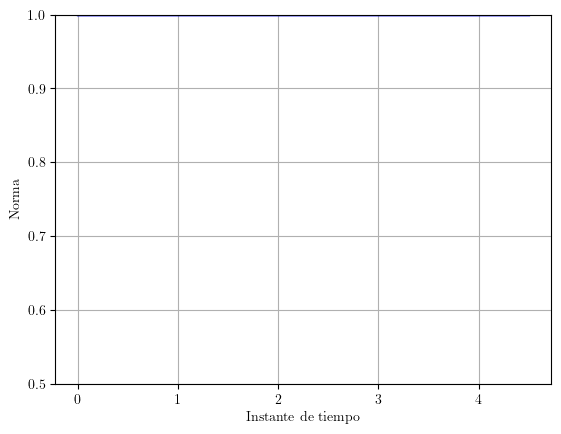

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parametros
L = 30  # Tamaño del dominio (en unidades adimensionales)
N = 2500 # Numero de puntos espaciales
dx = L / N  # Paso espacial
xi = np.linspace(-L / 2, L / 2, N)  # Grid espacial en unidades adimensionales
dt = 0.00005  # Paso temporal (en unidades adimensionales)
t_max = 4.5 # Tiempo final (tiempo maximo tuneleo)
t_steps = int(t_max / dt)  # Numero de pasos temporales



# Parámetros del paquete de ondas, función de onda input
xi0 = -4 # Posición inicial partícula
kappa_0 = 4 # Momento Inicial
psi0 = (2 / np.pi)**(1/4) * np.exp(-(xi - xi0)**2) * np.exp(1j * kappa_0 * xi)



# Barrera de potencial
alpha_param =60 
v_0 = 1.5 # Altura del potencial (V_0/Ec)
b = 0.75 # Grosor de la barrera (en unidades adimensionales, realmente es xi_b)
v = v_0 / (1 + np.abs(xi / b)**alpha_param)  # Forma explicita del potencial


# Matrices Crank-Nicolson 
alpha = 1j * dt / (kappa_0 * dx**2)  
beta = 1j * dt * kappa_0 / 2  
print(alpha,beta)

diagonal_a = (1 + alpha + beta * v) * np.ones(N)
off_diagonal = -(alpha / 2) * np.ones(N - 1)
A = diags([off_diagonal, diagonal_a, off_diagonal], [-1, 0, 1], format="csr")

diagonal_b = (1 - alpha - beta * v) * np.ones(N)
B = diags([-off_diagonal, diagonal_b, -off_diagonal], [-1, 0, 1], format="csr")



# Inicialización de la norma en función de t


dt_values = np.linspace (0.001, 1, 10)
t_steps = int(t_max / dt) 


# Solución del problema
for dt in dt_values: 

    print(dt)
    
    psi = psi0.copy()

    norma = []

    t_steps = int(t_max / dt) 

    t_values = np.linspace (0, t_max, t_steps)

    for t in range(t_steps):
       
        psi = spsolve(A, B @ psi)

        prob_density = np.abs(psi)**2

        # Integrar la densidad de probabilidad para obtener la probabilidad total
        prob_total = np.sum(prob_density) * dx  # Aproximación de la integral
        norma.append(prob_total)

    plt.plot(t_values, norma, linestyle='-', label = f'dt = {dt}', color='b')
    plt.xlabel('Instante de tiempo')
    plt.ylabel('Norma')
    plt.ylim(0.999, 1) 
    plt.grid(True)



plt.show()